<a href="https://colab.research.google.com/github/mariacmartins/curso-ia-para-todos/blob/main/%C3%81rvore_de_decis%C3%A3o_Covid19_Einstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesta aula, foi explorado técnicas de aprendizado supervisionado em machine learning, trabalhando com uma técnica de classificação. Trabalhamos com um dataset real disponibilizado pelo Hospital Albert Einstein, com resultados de **testes para covid-19**. 


In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/curso-ia-para-todos/main/dataset_einstein.csv', delimiter=';')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [3]:
count_row = df.shape[0]  # PEGANDO OS NÚMEROS DE REGISTROS
count_col = df.shape[1]  # PEGANDO OS NUMEROS DE COLUNAS

print(count_row)
print(count_col)

5644
11


In [6]:
# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN) 
df = df.dropna()

print(df.head())

print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])


#VAMOS VERIFICAR SE O BANCO DE DADOS ESTÁ BALANCEADO OU DESBALANCEADO
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])


         Patient ID  Patient age quantile  ... Proteina C reativa mg/dL  Creatinine
1   126e9dd13932f68                    17  ...                -0.147895    2.089928
8   8bb9d64f0215244                     1  ...                -0.286986   -1.838623
28  fc41531ca4faf1e                    13  ...                -0.434025   -0.701411
29  891d0f6449ff3d7                    14  ...                -0.529401    0.332418
30  ebdd7c67fcb21b4                     9  ...                 0.545572    1.021638

[5 rows x 11 columns]
Quantidade de campos(colunas):  11
Total de registros: 357
Total de registros negativos:  302
Total de registros positivos:  55


In [10]:
# VAMOS JOGAR AS ETIQUETAS PARA Y
Y = df['SARS-Cov-2 exam result'].values 

# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values


In [11]:
#dividindo dataset em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)


In [12]:
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO

algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO, 
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA. 

#AGORA PRECISAMOS TREINÁ-LA
modelo = algortimo_arvore.fit(X_treino, Y_treino)


[0.13553694 0.56306579 0.18040441 0.12099287]


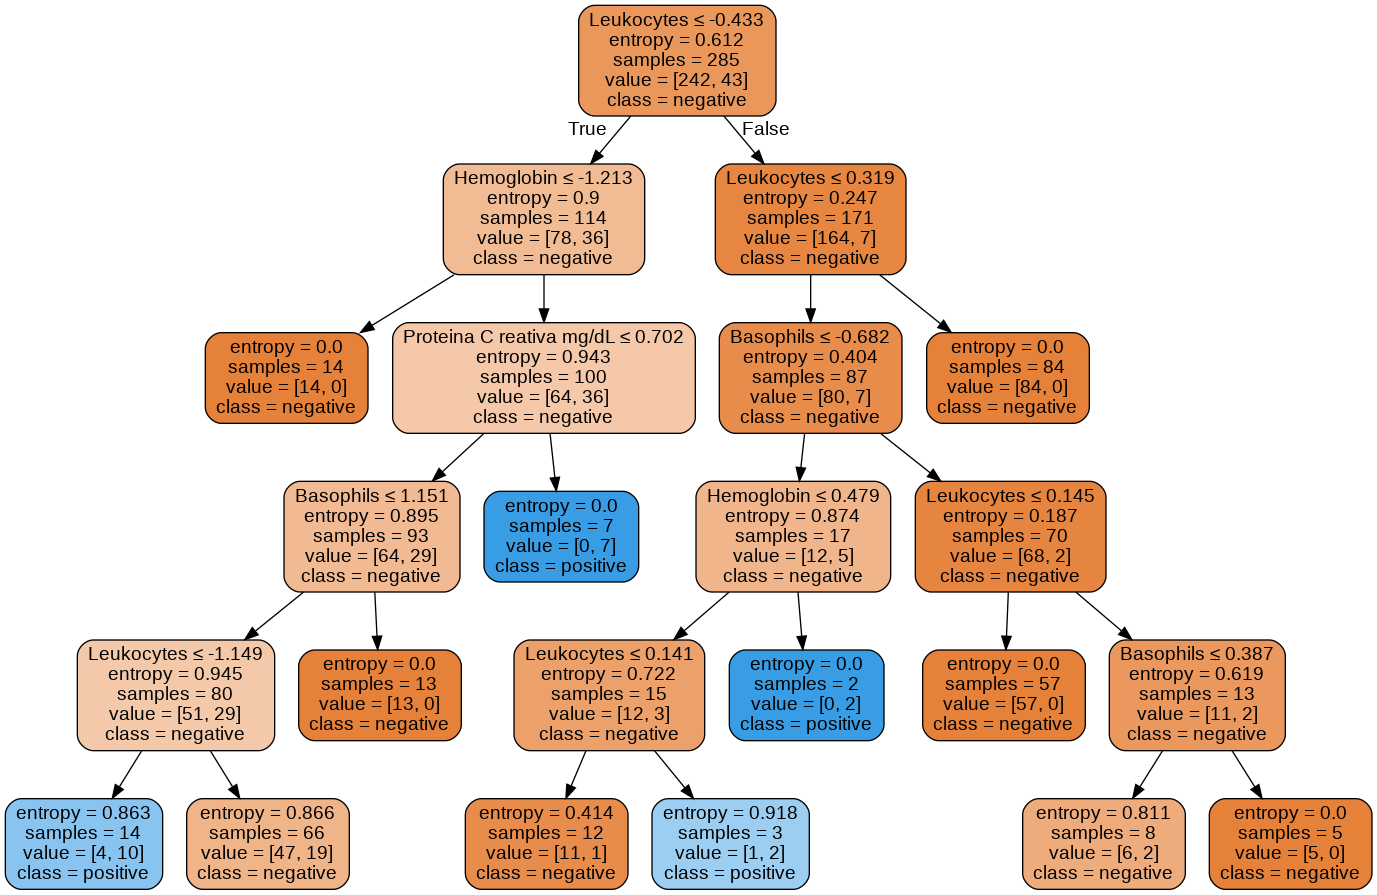

In [13]:
#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print (modelo.feature_importances_)


nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')


Feature ranking:
1. feature 1 (0.563066)
2. feature 2 (0.180404)
3. feature 0 (0.135537)
4. feature 3 (0.120993)


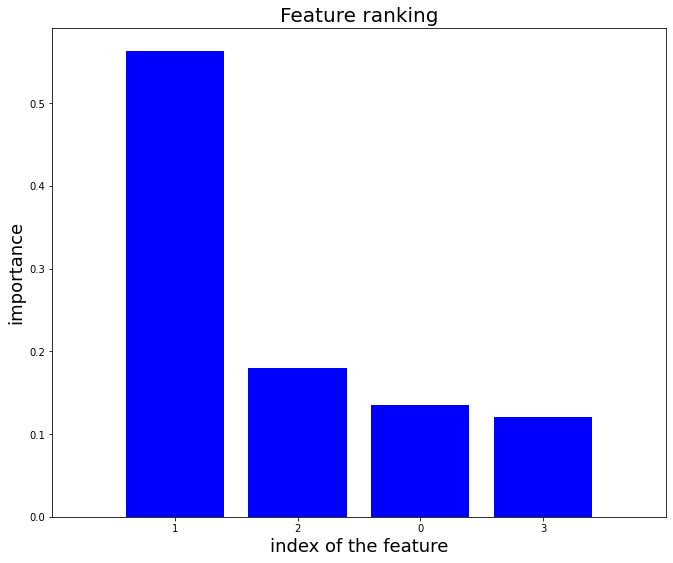

In [14]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']


In [15]:
# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = modelo.predict(X_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE


ACURÁCIA DA ÁRVORE:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


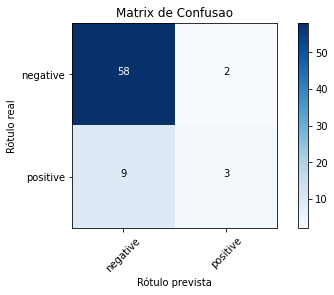

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')